In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/jorge/thesis')


from torch import Tensor
import torchvision.transforms.functional as TF
import torch

In [2]:
from PIL import Image

from text3d2video.utilities.video_comparison import display_vid
from text3d2video.utilities.video_util import pil_frames_to_clip

noises = torch.randn(5, 4, 64, 64)

def noise_imgs(noises: Tensor, res: int=512):
    images = []
    for noise in noises:
        noise_pil = TF.to_pil_image(noise[0:3, :, :].cpu())
        noise_pil = noise_pil.resize((res, res), Image.NEAREST)
        images.append(noise_pil)
    return images

display_vid(pil_frames_to_clip(noise_imgs(noises)))

In [3]:
from text3d2video.noise_initialization import RandomNoiseInitializer
from torch import Generator

device = 'cuda'

gen = Generator(device=device)
gen.manual_seed(0)

random_noise = RandomNoiseInitializer()

noise = random_noise.initial_noise(4, generator=gen, device=device)

display_vid(pil_frames_to_clip(noise_imgs(noise)))

In [10]:
from text3d2video.noise_initialization import FixedNoiseInitializer, RandomNoiseInitializer
from torch import Generator

device = 'cuda'

gen = Generator(device=device)
gen.manual_seed(0)

random_noise = FixedNoiseInitializer()

noise = random_noise.initial_noise(4, generator=gen, device=device)

display_vid(pil_frames_to_clip(noise_imgs(noise)))

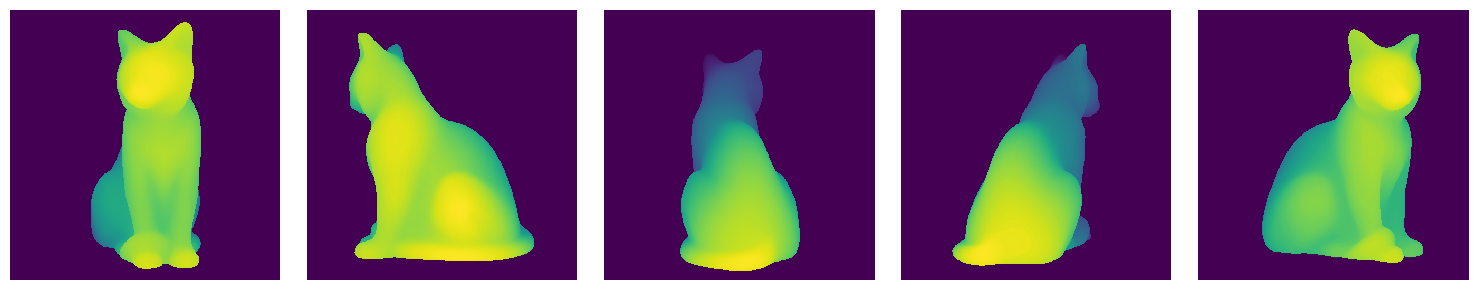

In [5]:
import torch

from text3d2video.artifacts.anim_artifact import AnimationArtifact
from text3d2video.rendering import render_depth_map
from text3d2video.utilities.ipython_utils import display_ims

anim = AnimationArtifact.from_wandb_artifact_tag("mv_cat_statue:latest")

cams, meshes = anim.load_frames(anim.frame_indices(5))
verts_uvs, faces_uvs = anim.uv_data()

display_ims(render_depth_map(meshes, cams))